# Time series

We will learn about time series

## `pd.Timestamp`

`pandas` represents moments in time using the `pandas.Timestamp` class. 

**Example**

In [1]:
import pandas as pd

# create a time stamp
pd.Timestamp(year=2020, month=10, day=18, hour=13, minute=1, second=27)

Timestamp('2020-10-18 13:01:27')

When we store multiple Timestamps in a `pd.Series` the data type of the column is set to `datetime64[ns]`

In [2]:
pd.Series([pd.Timestamp(2020,10,18),
           pd.Timestamp(2020,10,19),
           pd.Timestamp(2020,10,20)])

0   2020-10-18
1   2020-10-19
2   2020-10-20
dtype: datetime64[ns]

## Data

- Hourly precipitation data in Boulder, Colorado from 2000 to 2014
- September 2013: some of the most intense precipitation ever recorded 
- Goal: visualize precipitation data in 2013 and identify this weather event

About the data:
- Collected by NOAA 
- csv, access it at....https://www.ncei.noaa.gov/orders/cdo/3488381.csv

In [3]:
import pandas as pd

# read in data
url = 'https://www.ncei.noaa.gov/orders/cdo/3488381.csv'
precip = pd.read_csv(url)

precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,999.99,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.00,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.00,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.00,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.00,,q


<AxesSubplot:>

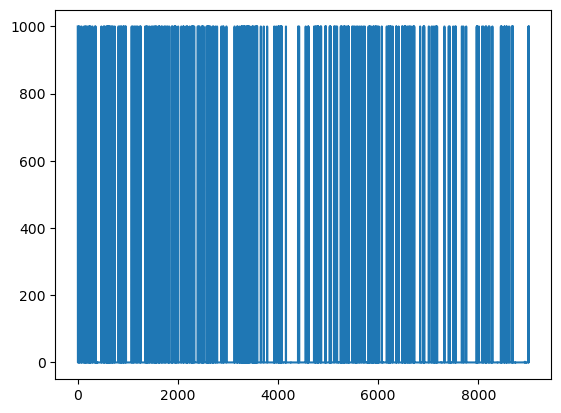

In [4]:
# first attempt at plotting precipitation
precip.HPCP.plot()

Issues with this graph:

1. All the 999.99 values are interpreted as data instead of missing values for HPCP.

2. x-axis values = index of the dataframe and not relative to time

3. we only want precipitation data from 2013, this is showing all our data

## Missing data

Metadata: missing values in HPCP column are indicated by the number 999.99

Solution: reload the datafram indicating that 999.99 is the missing value

How: add the `na_values` parameter to `pd.read_csv()` function to indicate additional values that should be recognized as `NA`

In [5]:
# read in csv indicating NA values
precip = pd.read_csv(url, na_values=[999.99, 9999])

#check updated df
precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,NaN,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.0,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.0,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.0,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.0,,q


<AxesSubplot:>

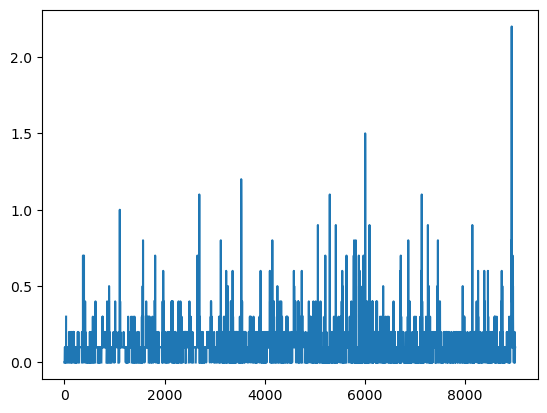

In [6]:
# another tyr at plotting
precip.HPCP.plot()

## Strings into dates

Notice DATE column in our dataframe is not of type `datetime64`. 

Check this using `dtypes` attribute for data frames:

In [7]:
# check data types of all columns
precip.dtypes

STATION              object
STATION_NAME         object
DATE                 object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

`object` dtype means (most likely) all vlaues in a that column are strings.

Convert strings to datetime objects using the `to_datetime()` pandas function:

- `pd.to_datetime()` input: pd.Series with strings that can be converted to dates
- `pd.to_datetime()` output: a pd.Series with the strings covnerted to datetime

Example

In [8]:
pd.to_datetime(precip.DATE)

0      2000-01-01 00:00:00
1      2000-01-01 01:00:00
2      2000-01-02 20:00:00
3      2000-01-03 01:00:00
4      2000-01-03 05:00:00
               ...        
9001   2013-12-22 01:00:00
9002   2013-12-23 00:00:00
9003   2013-12-23 02:00:00
9004   2013-12-29 01:00:00
9005   2013-12-31 00:00:00
Name: DATE, Length: 9006, dtype: datetime64[ns]

Overwrite the DATE column with this output

In [9]:
# convert DATE column from string to datetime
precip.DATE = pd.to_datetime(precip.DATE)

# check column data type is updated
print(precip.dtypes)

# check new values
precip.head()

STATION                     object
STATION_NAME                object
DATE                datetime64[ns]
HPCP                       float64
Measurement Flag            object
Quality Flag                object
dtype: object


,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,2000-01-01 00:00:00,NaN,],
1,COOP:055881,NEDERLAND 5 NNW CO US,2000-01-01 01:00:00,0.0,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,2000-01-02 20:00:00,0.0,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,2000-01-03 01:00:00,0.0,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,2000-01-03 05:00:00,0.0,,q


In [10]:
# each value in the DATE column is a pandas.Timestamp
type(precip.DATE.iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

<AxesSubplot:xlabel='DATE'>

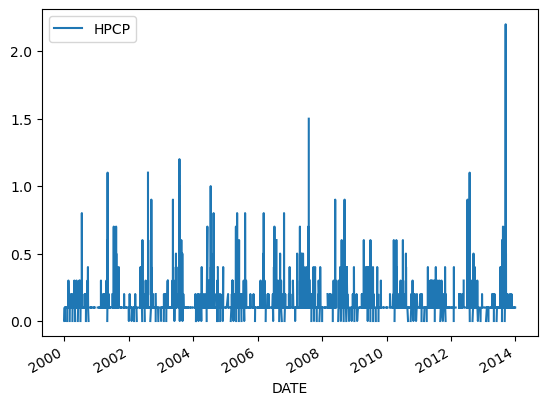

In [11]:
# another try at plotting
precip.plot(x='DATE', y='HPCP')

## Timestamp index

Let's set the DATE column as index.

Updating the index in a dataframe is simple, use the `set_index()` method. Syntax:
```
df = df.set_index(new_index)
```
where `new_index`:

- the name of the column (string) we want to set as an index,
- if our index is not a column, an array or `pd.Series` of the same length as data frame. 

Example

In [12]:
# set DATE as index
precip = precip.set_index('DATE')

#check the new index
precip.head()

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2000-01-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2000-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2000-01-02 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 05:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q


<AxesSubplot:xlabel='DATE'>

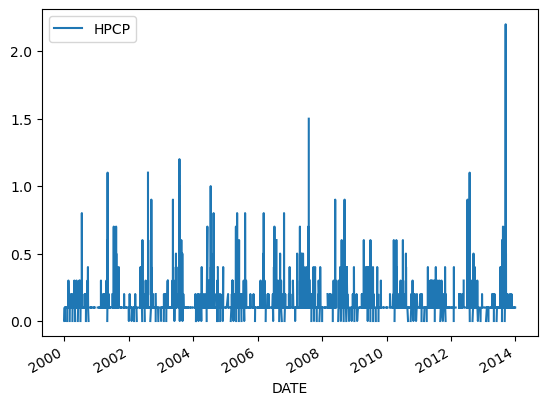

In [13]:
# simplify our plotting
precip.plot()

## Subsetting 
Once our indes if type timedate `pandas` can subset data in nice ways:

Example:

In [14]:
# select data from a given month and year
# use loc['year-month']
precip.loc['2013-09']

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2013-09-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2013-09-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,[,
2013-09-01 00:00:00,COOP:050183,ALLENSPARK 2 SE CO US,NaN,],
2013-09-01 01:00:00,COOP:050183,ALLENSPARK 2 SE CO US,NaN,[,
2013-09-01 00:00:00,COOP:055121,LONGMONT 6 NW CO US,NaN,},
...,...,...,...,...,...
2013-09-23 02:00:00,COOP:050843,BOULDER 2 CO US,0.2,,
2013-09-27 10:00:00,COOP:050843,BOULDER 2 CO US,0.1,,
2013-09-27 15:00:00,COOP:050843,BOULDER 2 CO US,0.1,,


In [15]:
# select data from a given year
# use loc['year']
precip.loc['2013']

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2013-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2013-01-10 02:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,[,
2013-01-13 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2013-01-26 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.1,,
2013-01-28 23:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.1,,
...,...,...,...,...,...
2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,NaN,[,
2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,NaN,],
2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,0.1,,


<AxesSubplot:xlabel='DATE'>

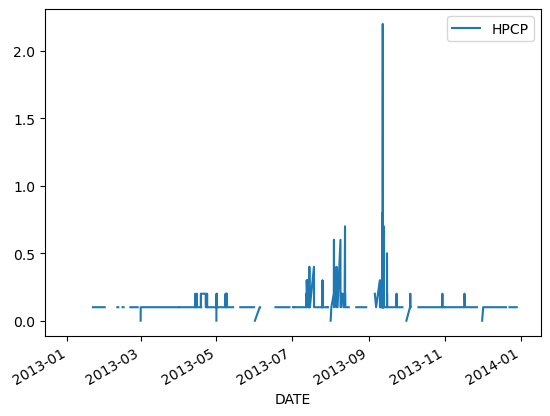

In [16]:
# use selection by time to plot 2013 data
precip.loc['2013'].plot()

## Resample

Resampling a time series means convertine a time series from one frequence to another. For example, 

- monthly to yearly (downsamplig)
- weekly to daily (upsampling).

We can resample with the `resample()` method. Simplest call:
```
df.resample(new_frequency).aggregator_function()
```

NOTE: `resample()` is *very ismilar* to `groupby()`: it is a method tha tis grouping your data in a certain way and then we need to specify a way to aggreate it to get an output.

Example:

Our 2013 dat has hourly frequencey and we want to resample ot daily frequency:

In [21]:
daily_precip_2013 = precip.loc['2013'].resample('D').sum()
daily_precip_2013

,HPCP
DATE,
2013-01-01,0.0
2013-01-02,0.0
2013-01-03,0.0
2013-01-04,0.0
2013-01-05,0.0
...,...
2013-12-27,0.0
2013-12-28,0.1
2013-12-29,0.0


<AxesSubplot:title={'center':'Precipitation in Boulder, CO during 2013'}, ylabel='daily precipitation (in)'>

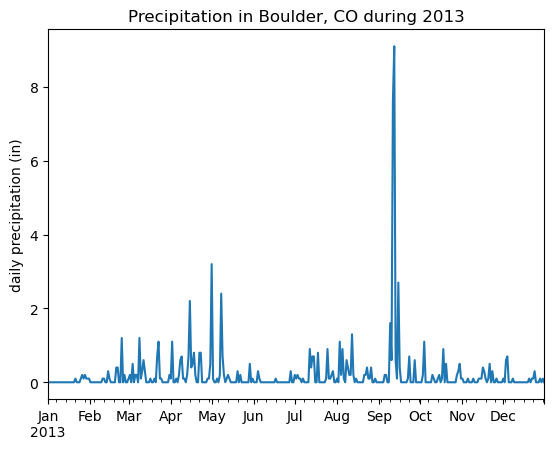

In [24]:
daily_precip_2013.plot(ylabel='daily precipitation (in)',
                       xlabel='',
                       title = 'Precipitation in Boulder, CO during 2013',
                       legend=False)